# Exploring BayWheels System Data

## Investigation Overview

In this investigation, I wanted to look at the different variables that are available in the BayWheels trip log.

## Dataset Overview

The data represents a log of all the trips registered in BayWheels database for the year 2017. The main attributes include the time of trips' starting and ending time, trip duration (in seconds) and station information, where bikes are taken and put back.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford.csv')

In [3]:
# Data Wrangling: Convert columns start_time and end_time to date format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

## Most Popular Stations

There is a total of 272 stations scattered across San Francisco and its outskirts. Let's take a look at the 10 most popular stations where people start and end their journeys, and their respective shares in the total pool of stations.

We can clearly see that in these 10 most popular stations, 3 of them stand out:
* San Francisco Ferry Building (Harry Bridges Plaza)
* The Embarcadero at Sansome St
* San Francisco Caltrain (Townsend St at 4th St)

Each of these stations accounts for 2.5-3%% of all the starting trips in the area, and for 3.0-3.4%% of all the ending trips. We can say that people tend to prefer to end their trips at these stations rather than take out their bikes there.

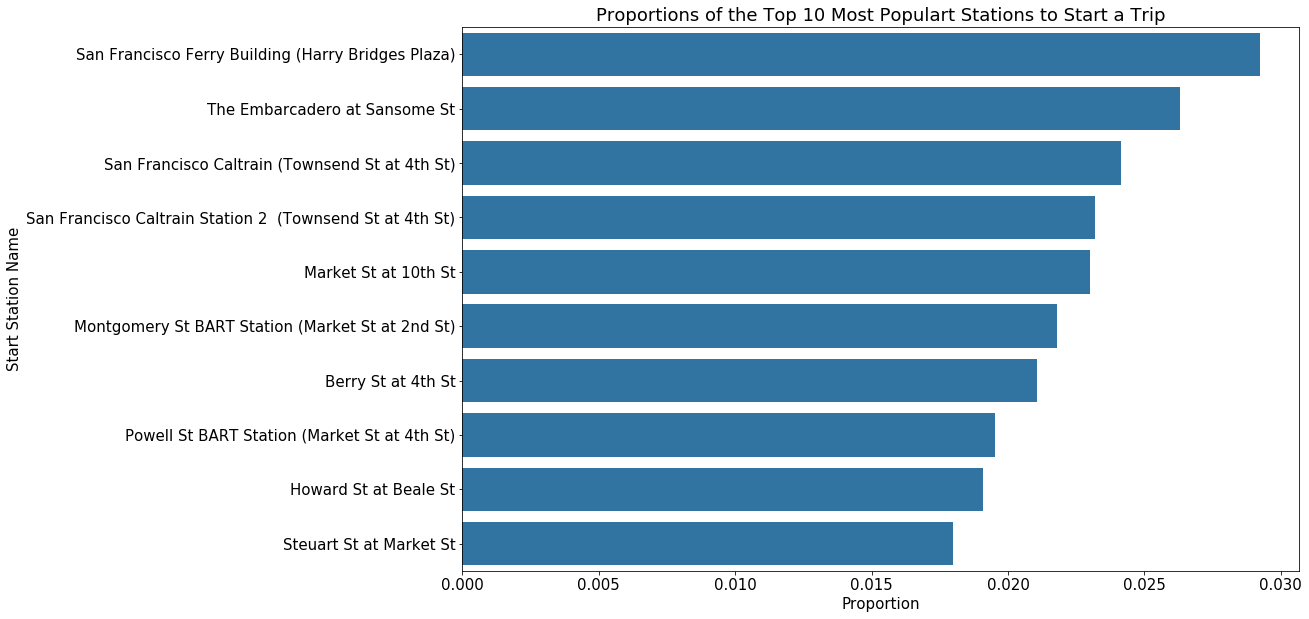

In [40]:
# get proportion taken by most common group for derivation of tick marks
n_station = df.shape[0]
station_counts = df['start_station_name'].value_counts()
max_type_count = station_counts[0]
max_prop = max_type_count / n_station

# Generate tick mark location and names
tick_props = np.arange(0, max_prop+0.005, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=[15,10])
base_color = sb.color_palette()[0]
order = df.start_station_name.value_counts().nlargest(10).index
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = order)

# Polish ticks, labels, and title
plt.title("Proportions of the Top 10 Most Populart Stations to Start a Trip", size = 18)
plt.xticks(tick_props * n_station, tick_names, size=15)
plt.yticks(size = 15)
plt.xlabel('Proportion', size = 15)
plt.ylabel("Start Station Name", size = 15)

plt.show()

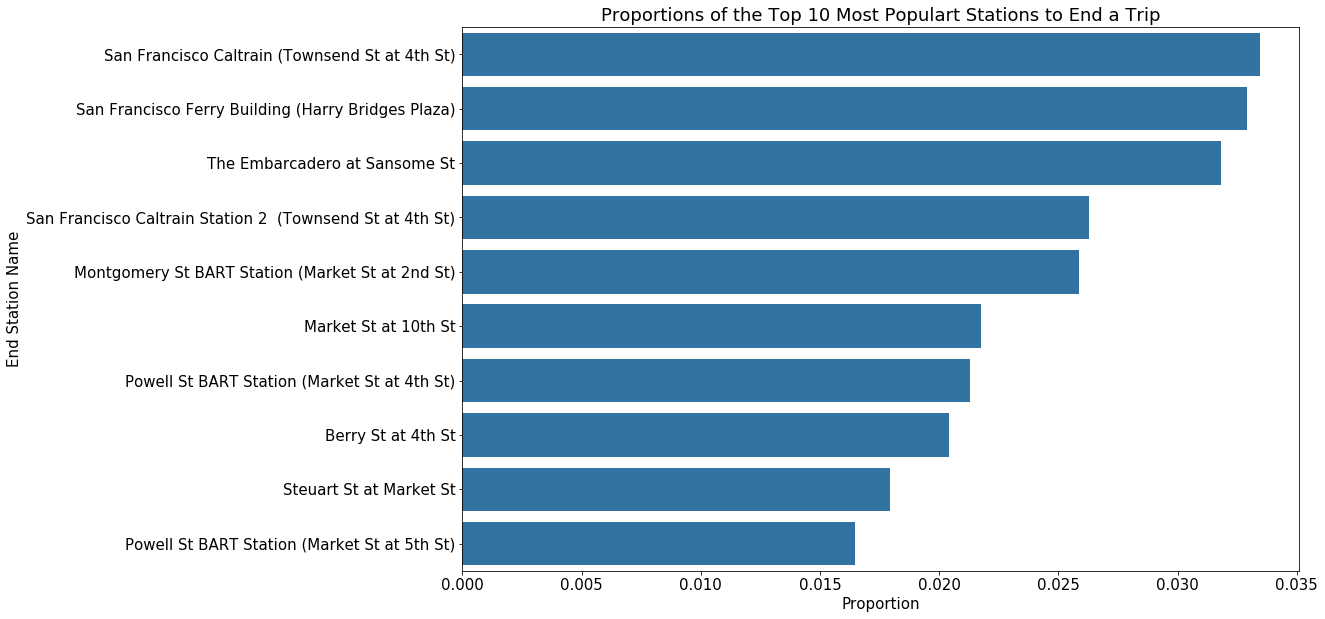

In [39]:
# get proportion taken by most common group for derivation of tick marks
n_station = df.shape[0]
station_counts = df['end_station_name'].value_counts()
max_type_count = station_counts[0]
max_prop = max_type_count / n_station

# Generate tick mark location and names
tick_props = np.arange(0, max_prop+0.005, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=[15,10])
base_color = sb.color_palette()[0]
order = df.end_station_name.value_counts().nlargest(10).index
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = order)

# Polish ticks, labels, and title
plt.title("Proportions of the Top 10 Most Populart Stations to End a Trip", size = 18)
plt.xticks(tick_props * n_station, tick_names, size=15)
plt.yticks(size = 15)
plt.xlabel('Proportion', size = 15)
plt.ylabel("End Station Name", size = 15)

plt.show()

## Trip Duration

One of the most descriptive characteristics of the database is the trip duration. Trip duration takes on a very large range of values: from 60 seconds (1 minute) to the maximum of 86,000 (around 24 hours!).
Using the logarithmic scale, we can colclude that the distribution of trip durations is unimodal, peaking in the region of 600 seconds (10 minutes).

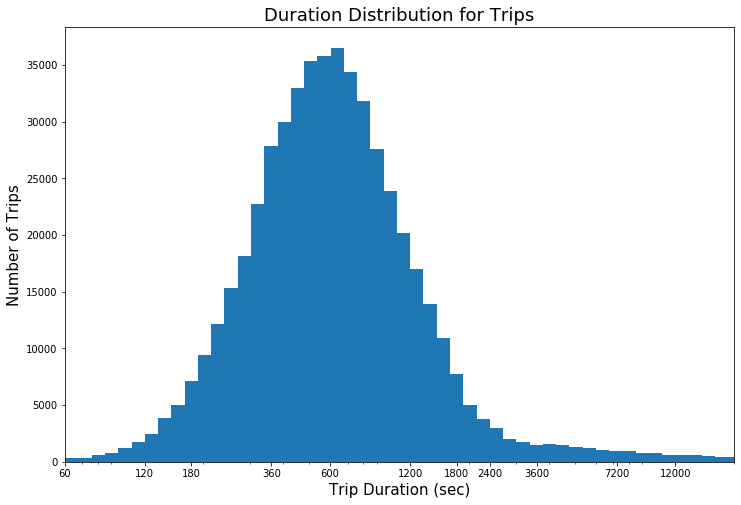

In [38]:
plt.figure(figsize=[12,8])

bin_edges = 10 ** np.arange(1.78, 4.93+0.05, 0.05)
ticks = [60, 120, 180, 360, 600, 1200, 1800, 2400, 3600, 7200, 12000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xscale('log')
plt.xlim(60,20000)

# Polish ticks, labels, and title
plt.xticks(ticks,labels)
plt.xlabel("Trip Duration (sec)", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.title("Duration Distribution of Trips", size = 18)

plt.show()

## Trip Timing

The timing of trips helps us understand: for which purposes (recreational of functional) the bikes are used? By plotting the data across hours when the trips took place, we can clearly see that the bike trip activity (both start and finish) peaks around the start and end of the workday. Also, the bikes are barely used during the night hours (from 0:00 to 5:00 in the morning).

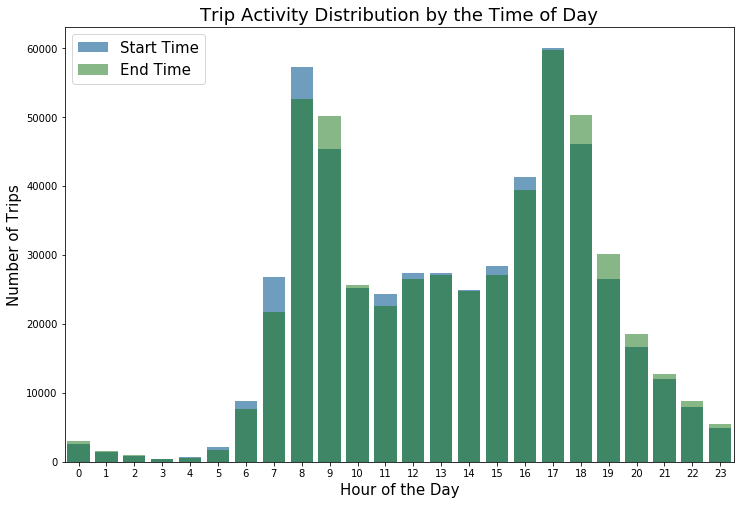

In [37]:
# Plot the barplot for when the trips usually start
plt.figure(figsize=[12,8])

start_hour = df.groupby(df['start_time'].dt.hour).size().reset_index(name='Counts')
sb.barplot(data = start_hour, x = 'start_time', y = 'Counts', color = base_color, alpha=0.7, label='Start Time')

end_hour = df.groupby(df['end_time'].dt.hour).size().reset_index(name='Counts')
sb.barplot(data = end_hour, x = 'end_time', y = 'Counts', color = 'green', alpha=0.5, label='End Time')

# Polish labels, legend, and title
plt.xlabel("Hour of the Day", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.title("Trip Activity Distribution by the Time of Day", size = 18)
plt.legend(loc = 'upper left', fontsize = 15)

plt.show()

## User Type

The next interesting value is the user type. Overall, the system has two categories of users: Subscribers and Customers.
By plotting every trip by the user type it had, we can clearly see that trips made by Subscribers represent around 79% of the total trip count, and trips made by the Customer group has a 21% frequency.

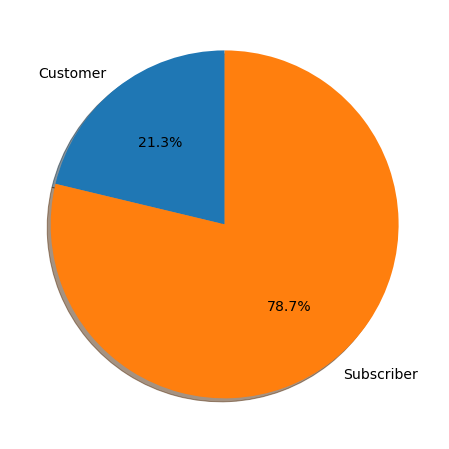

In [36]:
plt.figure(figsize=[8,8])

# Plot for User Type
user = df.groupby('user_type').size().reset_index(name='counts')
labels = user['user_type'].value_counts().index
plt.pie(data = user, x = 'counts', startangle = 90, labels = labels, autopct='%1.1f%%', shadow = True, textprops={'fontsize': 14})
plt.show()

## Trip Duration vs. User Type

Since we know that there are 2 different user categories, it is useful to see if there are any differences in their trip statistics. By plotting a box plot by user categories and using logarithmic scale of trip durations, we can notice that the Customer group tends to have longer trips - with their median of around 1100 seconds (approx. 18 minutes). However, when it comes to the Subscriber category, people are more likely to have shorter trips, with the median of 520 seconds (approx. 9 minutes).
This may be related to the fact to Customers pay per trip and tend to break even on their money with longer trips, whereas Subscribers do not need to do that since they pay on a periodic basis.

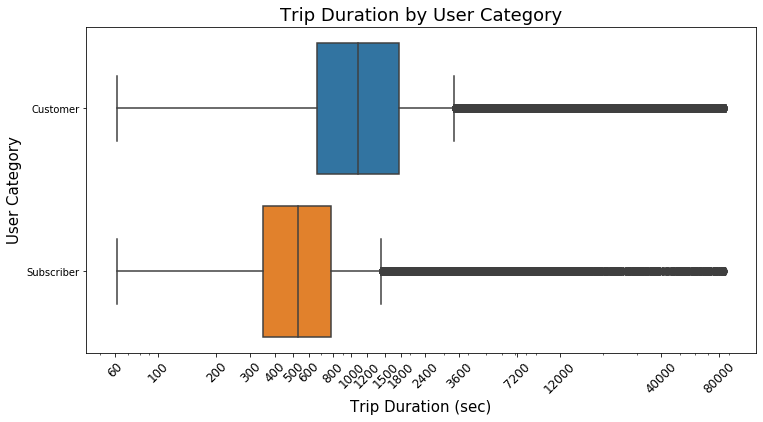

In [43]:
# Plot a box plot
plt.figure(figsize=[12,6])
sb.boxplot(data = df, y = 'user_type', x = 'duration_sec')

# Polish ticks and scales
ticks = [60, 100, 200, 300, 400, 500, 600, 800, 1000, 1200, 1500, 1800, 2400, 3600, 7200, 12000, 40000, 80000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 45, size = 12)

# Polish labels, legend, and title
plt.xlabel("Trip Duration (sec)", size = 15)
plt.ylabel("User Category", size = 15)
plt.title("Trip Duration by User Category", size = 18)

plt.show()

## Geographical Clustering
One very interesting feature can be explored if we decide to analyze GPS coordinates of the stations. By putting all of them on the heatmap, we can spot that actually not all the urban area is equally covered with bikes, but there are 3 main clusters where bikes are available:
* Cluster 1 - San José (37.320000, -121.890000)
* Cluster 2 - Oakland / Berkeley (37.78000, -122.27000)
* Cluster 3 - San Francisco (37.76000, -122.40000)

This information is easily confirmed if we decide to consult the BayWheels [interactive map](https://member.baywheels.com/map/).

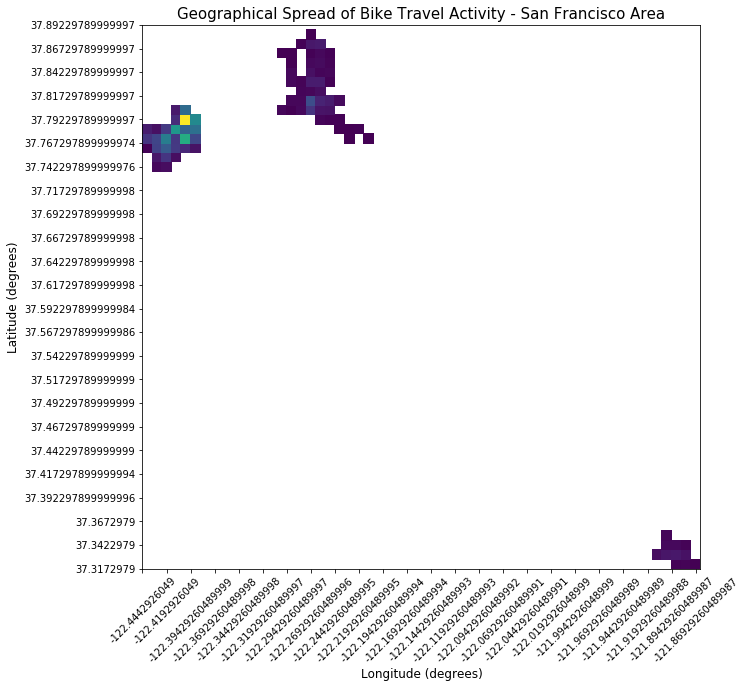

In [59]:
plt.figure(figsize=[10,10])

bins_x = np.arange(df.start_station_longitude.min(), df.start_station_longitude.max()+0.01, 0.01)
ticks_x = np.arange(df.start_station_longitude.min(), df.start_station_longitude.max()+0.025, 0.025)
bins_y = np.arange(df.start_station_latitude.min(), df.start_station_latitude.max()+0.01, 0.01)
ticks_y = np.arange(df.start_station_latitude.min(), df.start_station_latitude.max()+0.025, 0.025)

plt.hist2d(data = df, x = 'start_station_longitude', y = 'start_station_latitude', cmin = 0.5,
          bins = [bins_x, bins_y])
plt.xticks(ticks = ticks_x, labels = ticks_x, rotation = 45)
plt.yticks(ticks = ticks_y, labels = ticks_y)

plt.xlabel("Longitude (degrees)", size = 12)
plt.ylabel("Latitude (degrees)", size = 12)
plt.title("Geographical Spread of Bike Travel Activity - San Francisco Area", size = 15)

plt.show()

## Trip Duration vs. Geographical Segment

For the sake of high detalization, let's analyze only the San Francisco Area by the amount and duration of trips in each of its segments.
If we perform a multivariate analysis on starting points (`duration_sec`, `start_time_latitude`, `start_time_longitude`) and ending points (`duration_sec`, `end_time_latitude`, `end_time_longitude`), we can define some very interesting observations.

Firstly, the most active zone where the bikes are taken and put back is around the areas called **South of Market** and **Mission District**. Those are downtown areas with the most flat landscape in the city. Also, trips around these areas tend to be the shortest - most probably because bikes are used for short casual purposes like going to grab a coffee or move from one bar to another.

Secondly, the more we get away from downtown, the less frequent and more time consuming are the trips. The most probable explanation of that is that some people have these bike trips to get home from the downtown or vice versa. 

Finally, at the city's outskirts, the ending point trip durations are higher on average than the same duration as the starting points. If we take a look at San Francisco's map, we will see that almost all the area around it situated on hills, so for users it will take way more time to go uphill away from the downtown, rather than to take a bike on the edge of the city and get to the downtown downhill.

In [46]:
# Separate the biggest cluster - San Francisco - from other segments

df_sf = df[df['start_station_latitude'] > 37.7]
df_sf = df_sf[df_sf['start_station_longitude'] < (-122.37)]
df_sf = df_sf[df_sf['end_station_latitude'] > 37.7]
df_sf = df_sf[df_sf['end_station_longitude'] < (-122.37)]

In [47]:
# Round GPS coordinates down to 2 signs - to get a clearer geographical grid
df_sf['start_station_latitude'] = round(df_sf['start_station_latitude'],2)
df_sf['start_station_longitude'] = round(df_sf['start_station_longitude'],2)
df_sf['end_station_latitude'] = round(df_sf['end_station_latitude'],2)
df_sf['end_station_longitude'] = round(df_sf['end_station_longitude'],2)

In [48]:
# Calculate the duration mean
duration_mean = df_sf.duration_sec.mean()
duration_mean

1084.405813204313

In [49]:
# Create a dataframe with average trip durations by a starting point
gps_means_start = df_sf.groupby(['start_station_latitude', 'start_station_longitude']).mean()['duration_sec']
gps_means_start = gps_means_start.reset_index(name = 'duration_avg')
gps_means_start = gps_means_start.pivot(index = 'start_station_latitude', columns = 'start_station_longitude',
                            values = 'duration_avg')

# Create a dataframe with average trip durations by an ending point
gps_means_end = df_sf.groupby(['end_station_latitude', 'end_station_longitude']).mean()['duration_sec']
gps_means_end = gps_means_end.reset_index(name = 'duration_avg')
gps_means_end = gps_means_end.pivot(index = 'end_station_latitude', columns = 'end_station_longitude',
                            values = 'duration_avg')

# Create a dataframe with trip counts by a starting point
gps_count_start = df_sf.groupby(['start_station_latitude', 'start_station_longitude']).size()
gps_count_start = gps_count_start.reset_index(name = 'trip_count')
count_mean_start = gps_count_start['trip_count'].mean()
gps_count_start = gps_count_start.pivot(index = 'start_station_latitude', columns = 'start_station_longitude',
                            values = 'trip_count')

# Create a dataframe with trip counts by an ending point
gps_count_end = df_sf.groupby(['end_station_latitude', 'end_station_longitude']).size()
gps_count_end = gps_count_end.reset_index(name = 'trip_count')
count_mean_end = gps_count_end['trip_count'].mean()
gps_count_end = gps_count_end.pivot(index = 'end_station_latitude', columns = 'end_station_longitude',
                            values = 'trip_count')

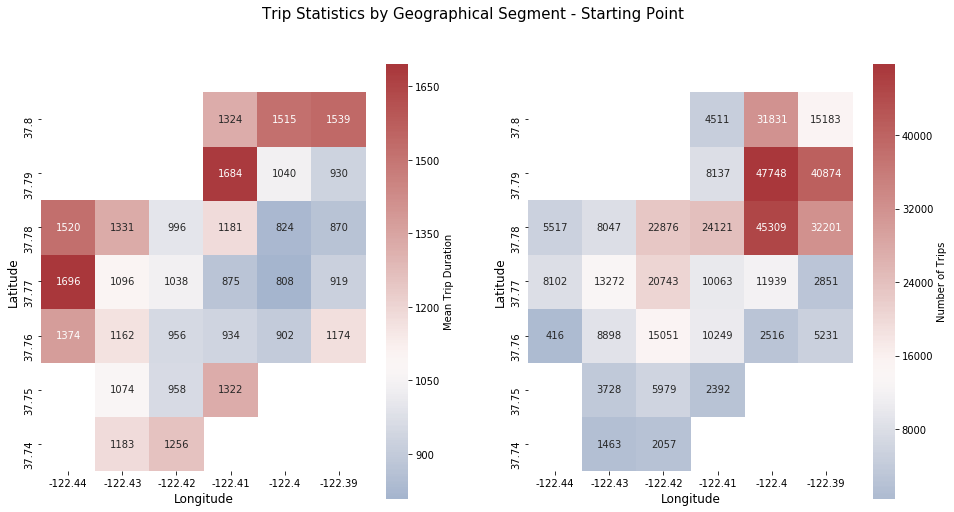

In [56]:
# Plot two ending point heatmaps together for better comparison
plt.figure(figsize=[18,10])

# ----- Plot 1 -----
plt.subplot(1,2,1)
ax1 = sb.heatmap(gps_means_start, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Mean Trip Duration'}, center = duration_mean, square = True, cmap = 'vlag')

# Prevent top and bottom boxes from being cut off
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

# reverse y-axis
ax1.invert_yaxis()

# labels
plt.ylabel("Latitude", size = 12)
plt.xlabel("Longitude", size = 12)

# ----- Plot 2 -----
plt.subplot(1,2,2)
ax2 = sb.heatmap(gps_count_start, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Number of Trips'}, center = count_mean_start, square = True, cmap = 'vlag')

# Prevent top and bottom boxes from being cut off
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)

# reverse y-axis
ax2.invert_yaxis()

# labels
plt.ylabel("Latitude", size = 12)
plt.xlabel("Longitude", size = 12)

# Add the common title
plt.suptitle("Trip Statistics by Geographical Segment - Starting Point", size = 15)

plt.show()

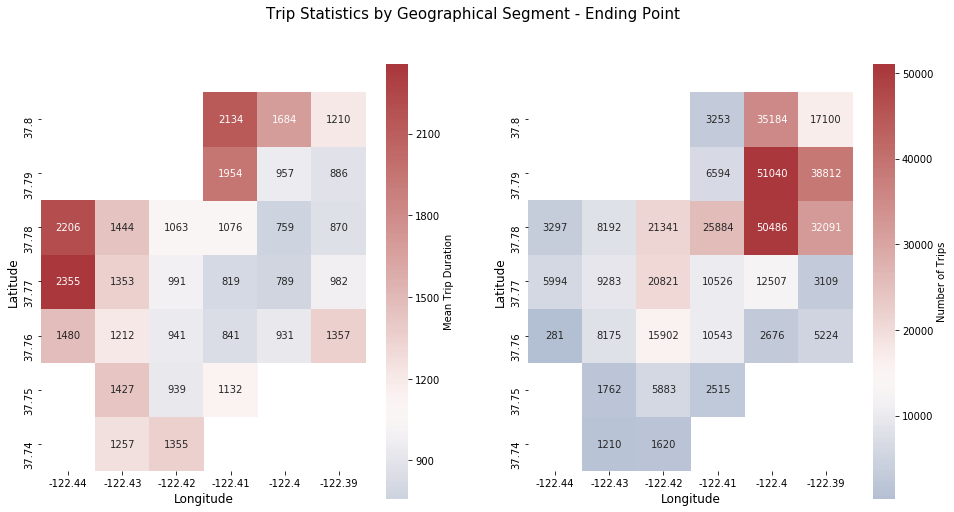

In [57]:
# Plot two ending point heatmaps together for better comparison
plt.figure(figsize=[18,10])

# ----- Plot 1 -----
plt.subplot(1,2,1)
ax1 = sb.heatmap(gps_means_end, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Mean Trip Duration'}, center = duration_mean, square = True, cmap = 'vlag')

# Prevent top and bottom boxes from being cut off
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

# reverse y-axis
ax1.invert_yaxis()

# labels
plt.ylabel("Latitude", size = 12)
plt.xlabel("Longitude", size = 12)

# ----- Plot 2 -----
plt.subplot(1,2,2)
ax2 = sb.heatmap(gps_count_end, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'Number of Trips'}, center = count_mean_end, square = True, cmap = 'vlag')

# Prevent top and bottom boxes from being cut off
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)

# reverse y-axis
ax2.invert_yaxis()

# labels
plt.ylabel("Latitude", size = 12)
plt.xlabel("Longitude", size = 12)

# Add the common title
plt.suptitle("Trip Statistics by Geographical Segment - Ending Point", size = 15)

plt.show()